<a href="https://colab.research.google.com/github/RafaelBNN/es203/blob/main/Trabalho_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste Notebook, vamos aplicar o método dos elementos finitos para determinar a capacitância de um capacitor e o potencial elétrico num ponto qualquer entre suas placas. A configuração do capacitor é descrita abaixo.

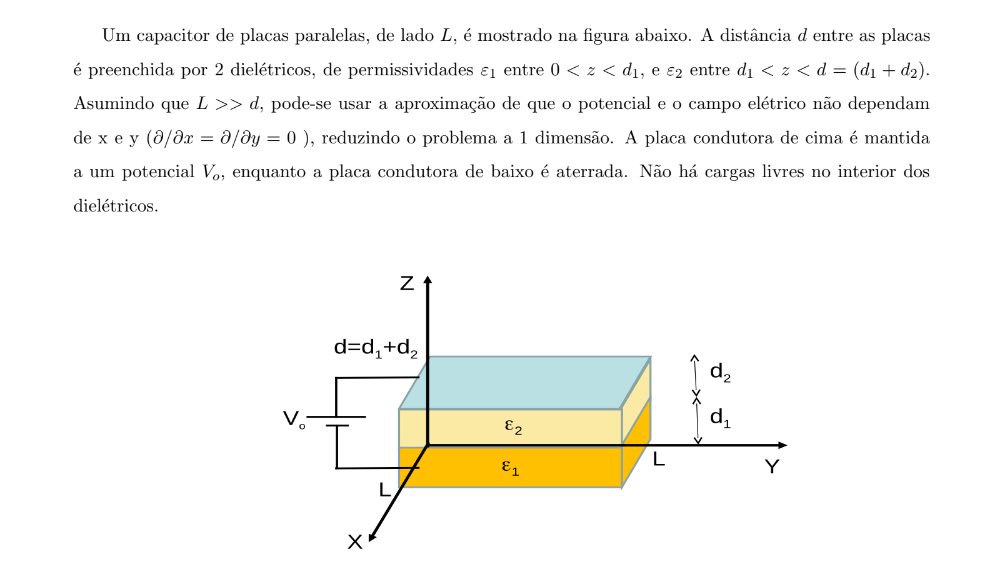

Dito isso, o método dos elementos finitos pode ser dividido em 8 etapas. Vamos aplicá-las, cada uma, passo a passo.

# Passo 1

Inicialmente, para a aplicação do método, deve-se dividir o problema em vários segmentos. No nosso caso, vamos "fatiar" os dois dielétricos com relação ao eixo $z$ da figura em seções de mesmo tamanho. Vamos dividir o primeiro dielétrico (de baixo) em $N_1$ segmentos, e o de cima em $N_2$ segmentos, totalizando $N = N_1 + N_2$ elementos de comprimento em relação ao eixo z $L = d/N$.

A célula abaixo declara as variáveis referentes a $d$, $N_1$, $N_2$, $N$ e $L$. 

# Passo 2

Agora, devemos realizar uma aproximação linear do potencial em cada intervalo:

$$V^e(z) = az +b\ ,\ z_e \leq z \leq z_{e+1}$$
$$V^e(z_e) = V_e\ ,\ V_e(z_{e+1}) = V_{e+1}$$

Resolvendo, temos:

$$
V^e(z) = V_eN^e_1(z) + V_{e+1}N^e_2(z)\ ,\  z_e \leq z \leq z_{e+1}
$$
onde
$$
N^e_1(z) = \frac{z_{e+1} - z}{L}\ ,\ N^e_2(z) = \frac{z - z_e}{L}
$$

# Passo 3

Aqui, reescrevemos a equação 
$$
\frac{d}{dx} \left( \epsilon_0 \epsilon_r \frac{dV}{dx} \right) = 0
$$
de forma a obter mais informações dela. Assim, multiplicando essa equação diferencial por uma função $w(x)$, temos:

$$
\int_{x_e}^{x_{e+1}} \frac{d}{dx} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dx} \right) w(x) = 0
$$

Integrando por partes:

$$
\int_{x_e}^{x_{e+1}} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dx} \right) \frac{dw(x)}{dx} = \epsilon_0 \epsilon_r^e \frac{dV(x_{e+1})}{dx}w(x_{e+1}) - \epsilon_0 \epsilon_r^e \frac{dV(x_e)}{dx} w(x_e)
$$

No nosso caso, utizando $z$ no lugar de $x$:

$$
\int_{z_e}^{z_{e+1}} \left( \epsilon_0 \epsilon_r^e \frac{dV}{dz} \right) \frac{dw(z)}{dz} = \epsilon_0 \epsilon_r^e \frac{dV(z_{e+1})}{dz}w(z_{e+1}) - \epsilon_0 \epsilon_r^e \frac{dV(z_e)}{dz} w(z_e)
$$

# Passo 4

Assim, utilizando a função de $V^e(z)$ obtida no Passo 2:

$$
-V_e \frac{\epsilon_0 \epsilon_r^e}{L} + V_{e+1} \frac{\epsilon_0 \epsilon_r^e}{L} = - \epsilon_0 \epsilon_r^e \frac{dV(x_e)}{dx}
$$

$$
V_e \frac{\epsilon_0 \epsilon_r^e}{L} - V_{e+1} \frac{\epsilon_0 \epsilon_r^e}{L} = \epsilon_0 \epsilon_r^e \frac{dV(x_{e+1})}{dx}
$$

Assim, obtemos um sistema 2x2. No entanto, tal sistemal é impossível de ser resolvido por si só. Isso nos leva ao Passo 5.

# Passo 5

Para podermos resolver os sistemas 2x2 obtidos, teremos que usar as condições de contorno da eletrostática, de maneira a obter um sistema NxN a partir desses sistemas originais. Dessa forma, utilizando que

$$
\epsilon_1 \frac{dV^-}{dx} = \epsilon_2 \frac{dV^+}{dx}
$$

obtemos sistemas 2x2 resultantes que serão unidos no Passo 6.

# Passo 6

A união dos sistemas lineares 2x2 resultantes nos dá o seguinte sistema:

$$
AV = B
$$

onde

$$
A=
\begin{bmatrix}
    -\frac{\epsilon_0\epsilon^0_r}{L}  & \frac{\epsilon_0\epsilon^0_r}{L} & 0 &\cdots & 0 & 0 \\
    \frac{\epsilon_0\epsilon^0_r}{L}  & -\frac{\epsilon_0\epsilon^0_r}{L}  - \frac{\epsilon_0\epsilon^1_r}{L}  & \frac{\epsilon_0\epsilon^1_r}{L} & \cdots & 0 & 0 \\
    0 & \frac{\epsilon_0\epsilon^1_r}{L} & -\frac{\epsilon_0\epsilon^1_r}{L} - \frac{\epsilon_0\epsilon^2_r}{L} & \dots & 0 & 0\\
    \vdots  & \vdots & \vdots & \ddots & 0 & 0  \\
    0 & 0 & 0 & \cdots & -\frac{\epsilon_0\epsilon^{N-2}_r}{L} - \frac{\epsilon_0\epsilon^{N-1}_r}{L} & \frac{\epsilon_0\epsilon^{N-1}_r}{L} \\
    0 & 0 & 0 & \dots & \frac{\epsilon_0\epsilon^{N-1}_r}{L} & -\frac{\epsilon_0\epsilon^{N-1}_r}{L}
\end{bmatrix}
$$

$$
V=
\begin{bmatrix}
    V_0 \\
    V_1 \\
    \vdots  \\
    V_{N-1}\\
    V_{N}
\end{bmatrix}
$$

$$
B=
\begin{bmatrix}
    -e_0e^0_r \frac{dV(z_0)}{dz}\\
    0  \\
    \vdots \\
    0 \\
    e_0e^{N-1}_r \frac{dV(z_N)}{dz}
\end{bmatrix}
$$

# Passo 7

Aqui, perceba que os valores de $V(0)$ e $V(z_{N-1})$ são conhecidos. Assim, podemos retirar essas equações do sistema (removendo a primeira e última linha e a primeira e última coluna). Assim, ficamos com o sistema reduzido

$$
A'V'=B'
$$
onde

$$
A'=
\begin{bmatrix}
    -\frac{\epsilon_0\epsilon^0_r}{L}  - \frac{\epsilon_0\epsilon^1_r}{L}  & \frac{\epsilon_0\epsilon^1_r}{L} & \cdots & 0 \\
    \frac{\epsilon_0\epsilon^1_r}{L} & -\frac{\epsilon_0\epsilon^1_r}{L} - \frac{\epsilon_0\epsilon^2_r}{L} & \dots & 0 \\
    \vdots & \vdots & \ddots & 0 \\
    0 & 0 & \cdots & -\frac{\epsilon_0\epsilon^{N-2}_r}{L} - \frac{\epsilon_0\epsilon^{N-1}_r}{L}\\
\end{bmatrix}
$$

$$
V'=
\begin{bmatrix}
    V_1 \\
    V_2 \\
    \vdots  \\
    V_{N-3}\\
    V_{N-2}
\end{bmatrix}
$$

$$
B'=
\begin{bmatrix}
    -\frac{e_0e^0_r}{L} V_0\\
    0  \\
    \vdots \\
    0 \\
    -\frac{e_0e^{N-1}_r}{L} V_{N-1}
\end{bmatrix}
$$

E, então, assim, calculamos a matriz $V'$.

# Passo 8

Por fim, para encontrar a capacitância, podemos utilizar a seguinte fórmula:

$$
C = \epsilon_0 \epsilon_{r2} \frac{A(V_N-V_{N-1})}{L(V_N-V_0)}
$$

# Implementação Computacional

In [91]:
# Importando as bibliotecas necessarias

import numpy as np
import matplotlib.pyplot as plt

Agora, vamos implementar o método dos elementos finitos na linguagem Python e calcular a potência elétrica e a capacitância por meio computacional. Depois, vamos comparar esses resultados com os resultados teóricos.

Primeiro, vamos definir as variáveis que serão utilizadas nos cálculos. Do problema, temos que $A = 4\ cm^2$, $d_1 = d_2 = 1\ mm$, $\epsilon_{r1} = 2$, $\epsilon_{r2} = 4$, $V_0 = 1\ V$ e $V_{N-1} = 0\ V$, e sabemos que $\epsilon_0 = 8,25*10^{-12}$. Além disso, vamos escolher, inicialmente, $N_1 = N_2 = 3$. A célula abaixo declara essas variáveis.

In [92]:
area = 4e-4     # area das placas

d1 = 1e-3       # comprimento do primeiro dieletrico em relacao ao eixo z
d2 = 1e-3       # comprimento do segundo dieletrico em relacao ao eixo z
d = d1+d2       # distancia entre as placas

eps0 = 8.25e-12 # permissividade eletrica no vacuo
epsR1 = 2       # permissividade eletrica do primeiro dieletrico
epsR2 = 4       # permissividade eletrica do segundo dieletrico

v0 = 1          # potencial eletrico na placa de cima
vf = 0          # potencial eletrico na placa de baixo

n1 = 3          # numero de secoes do dieletrico 1
n2 = 3          # numero de secoes do dieletrico 2
n = n1 + n2     # numero total de elementos

l = d/n         # comprimento de cada elemento

Como vimos, para calcular a aproximação do potencial elétrico num ponto entre as duas placas, devemos resolver o sistema linear mostrado no Passo 7. Dessa forma, vamos montar o sistema descrito no código.

In [93]:
# Vamos definir uma funcao para montar a matriz A'

def criaMatrizALinha(n1, n2):

    # Primeiro, declaramos uma matriz contendo apenas zeros com dimensao (n-1)x(n-1).
    n = n1+n2
    matriz = np.zeros((n-1,n-1))

    # Agora, vamos adicionar os valores nao-nulos da matriz.
    # Perceba que, para as linhas de indice<n1-1 da matriz, todos os "epsilons" utilizados no sistema sao referentes
    # a permissividade do primeiro dieletrico.
    # E, para as linhas com indice>=n1, apenas a permissividade do segundo dieletrico eh empregada.
    # A unica diferenca ocorre na linha de indice n1-1, onde os "epsilons" sao diferentes.
    # Tendo isso em mente, vamos adicionar esses termos a matriz A'

    # Adicionamos, primeiro, os termos da primeira e da ultima linha

    matriz[0][0] = -(eps0*epsR1)/l - (eps0*epsR1)/l
    matriz[0][1] = (eps0*epsR1)/l

    matriz[n-2][n-2] = -(eps0*epsR2)/l - (eps0*epsR2)/l
    matriz[n-2][n-3] = (eps0*epsR2)/l

    # Agora, os termos das linhas entre elas

    for i in range(1, n-2):
        if (i<n1-1):                          # Os termos da matriz antes da "transicao" entre os dieletricos
            matriz[i][i] = -(eps0*epsR1)/l - (eps0*epsR1)/l
            matriz[i][i-1] = (eps0*epsR1)/l
            matriz[i][i+1] = (eps0*epsR1)/l
        elif (i==n1-1):                       # Os termos da matriz na linha da transicao
            matriz[i][i] = -(eps0*epsR1)/l - (eps0*epsR2)/l
            matriz[i][i-1] = (eps0*epsR1)/l
            matriz[i][i+1] = (eps0*epsR2)/l
        else:                               # Os termos da matriz apos a transicao
            matriz[i][i] = -(eps0*epsR2)/l - (eps0*epsR2)/l
            matriz[i][i-1] = (eps0*epsR2)/l
            matriz[i][i+1] = (eps0*epsR2)/l

    return matriz

matriz = criaMatrizALinha(n1,n2)
matriz

array([[-9.900e-08,  4.950e-08,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 4.950e-08, -9.900e-08,  4.950e-08,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  4.950e-08, -1.485e-07,  9.900e-08,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  9.900e-08, -1.980e-07,  9.900e-08],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  9.900e-08, -1.980e-07]])

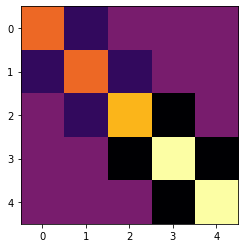

In [94]:
# Plotando a matriz com cores.
# Isso nos ajuda a verificar se implementamos a matriz A' de acordo com a mostrada no Passo 7.

plt.imshow(matriz, interpolation='none', cmap='inferno_r')
plt.show()

In [95]:
# Agora, vamos criar uma funcao que monta a matriz colunar B'

def criaMatrizBLinha(n1, n2):

    # Primeiro, declaramos uma matriz nula de dimensoes 1xn
    n=n1+n2
    matrizB = np.zeros((n-1,1))

    # Agora, alteramos o primeiro e o ultimo valor, como mostrado no Passo 7.
    # Perceba, porem, que o v0 mostrado eh o nosso vf, e o vn-1 citado eh o nosso v0. 
    matrizB[0][0] = -(eps0*epsR1)*vf/l
    matrizB[n-2][0] = -(eps0*epsR2)*v0/l

    return matrizB

matrizB = criaMatrizBLinha(n1,n2)
matrizB

array([[-0.0e+00],
       [ 0.0e+00],
       [ 0.0e+00],
       [ 0.0e+00],
       [-9.9e-08]])

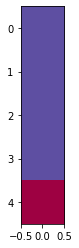

In [96]:
# Plotando com cores

plt.imshow(matrizB, interpolation='none', cmap='Spectral')
plt.show()

A partir do sistema, descrito pelas matrizes $A'$ e $B'$, podemos calcular $V'$ utilizando a função `numpy.linalg.solve`. A célula abaixo faz esse cálculo e exibe o gráfico da solução.

[0.         0.22222222 0.44444444 0.66666667 0.77777778 0.88888889
 1.        ]


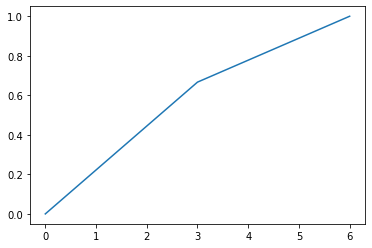

In [97]:
matrizV = np.linalg.solve(matriz, matrizB)

# Adicionamos os nos das pontas para totalizar os 7 nos
matrizV = np.append(vf, matrizV)
matrizV = np.append(matrizV, v0)

print(matrizV)
plt.plot(matrizV)

Dado o resultado obtido acima, o método dos elementos finitos oferece uma melhor aproximação quando aumentamos a quantidade de elementos. Isso pode ser visualizado ao realizarmos a aproximação da função seno.

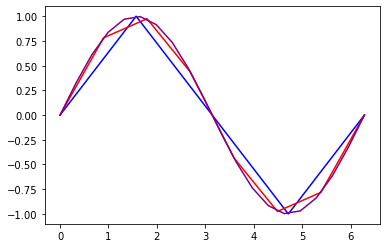

In [98]:
# O terceiro parametro eh o numero de "passos" que damos, similar ao numero de elementos do metodo dos elementos finitos.
# Note que, aumentando os passos, obtemos uma funcao mais proxima a original
x = np.linspace(0,2*np.pi,5)
x2 = np.linspace(0,2*np.pi,8)
x3 = np.linspace(0,2*np.pi,20)

plt.plot(x,np.sin(x),color='blue')
plt.plot(x2,np.sin(x2),color='red')
plt.plot(x3,np.sin(x3),color='purple')

Agora, vamos aumentar o numero de elementos para o cálculo do potencial e comparar os resultados.

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94
 0.96 0.98 1.  ]


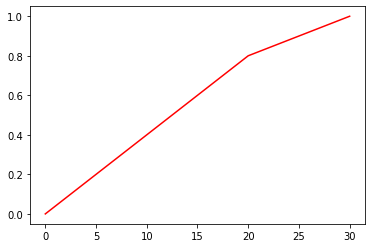

In [99]:
n1 = 20
n2 = 10

matrA = criaMatrizALinha(n1,n2)
matrB = criaMatrizBLinha(n1,n2)

matrizV2 = np.linalg.solve(matrA, matrB)
matrizV2 = np.append(vf, matrizV2)
matrizV2 = np.append(matrizV2, v0)

print(matrizV2)
plt.plot(matrizV2, color='red')

[0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.525
 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825
 0.85  0.875 0.9   0.925 0.95  0.975 1.   ]


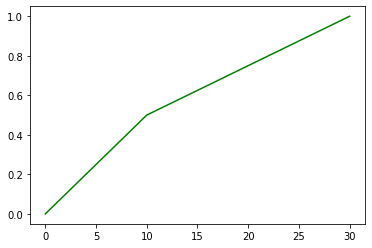

In [100]:
n1 = 10
n2 = 20

matrA = criaMatrizALinha(n1,n2)
matrB = criaMatrizBLinha(n1,n2)

matrizV3 = np.linalg.solve(matrA, matrB)
matrizV3 = np.append(vf, matrizV3)
matrizV3 = np.append(matrizV3, v0)

print(matrizV3)
plt.plot(matrizV3, color='green')

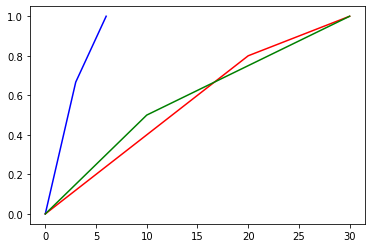

In [101]:
plt.plot(matrizV, color='blue')
plt.plot(matrizV2, color='red')
plt.plot(matrizV3, color='green')

A diferença ds gráficos mostrada na figura acima é esperada. Ela acontece porque o eixo x indica o número do nó em que estamos, e não a distância ao eixo z.

Agora, vamos realizar o cálculo computacional da capacitância utilizando a fórmula do Passo 8. Faremos isso para as 3 curvas mostradas acima.

In [109]:
def capac(epsR2,area,l,matrizV):
    print(l)
    return eps0*epsR2*area*(matrizV[n]-matrizV[n-1])/(l*(matrizV[n]))
         #capacitance = ((e0*er2)*(L**2)*(matrPotential[n] - matrPotential[n-1]))/(l2*matrPotential[n])
capac1 = capac(epsR2,area,l,matrizV)
capac2 = capac(epsR2,area,l,matrizV2)
capac3 = capac(epsR2,area,l,matrizV3)

print(capac1)
print(capac2)
print(capac3)

0.0003333333333333333
0.0003333333333333333
0.0003333333333333333
4.400000000000002e-12
6.600000000000001e-12
6.599999999999997e-12
